# Appendix Report Vera C. Rubin Observatory Legacy Survey of Space and Time (LSST) Internship

Author: **Alessandro Salvatore Tramuto**

Date: **January 2022**

Here We present an applicative MAF example, as an appendix to the [main report](https://github.com/AlessandroSalvatoreTramuto/internship).

It must be said that the baseline_v2.0_10yrs, the latest version (on the date 02 January 2022), has been used in this notebook.

In [1]:
# all the imports we need, using the kernel LSST-2021.10.13 Py3

import rubin_sim
from rubin_sim import maf

%matplotlib inline
import matplotlib.pyplot as plt

import rubin_sim.maf.db as db
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.stackers as stackers
import rubin_sim.maf.plots as plots
import rubin_sim.maf.metricBundles as metricBundles

_Here We define metric, slicer and constraint. _metric1_ evaluates the maximum value of _fiveSigmaDepth_ for all the visits in each slice (_fiveSigmaDepth_ is one of the columns that can be found on https://confluence.lsstcorp.org/display/SIM/Summary+Table+Column+Descriptions). _slicer1_ slices and groups the visits by their position on the sky, as being an HealpixSlicer. _sqlconstraint_ applies a filter to query, in this case selects only visits in the _i_ band._

In [2]:
metric1= metrics.MaxMetric('airmass')
slicer1= slicers.HealpixSlicer(nside=64)
sqlconstraint= 'filter = "i"'

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [3]:
#in this way we can make the metric bundle:
airmassSky = metricBundles.MetricBundle(metric1, slicer1, sqlconstraint)

_In the following cell we divide the database (_opsdb_) path in root (_dbroot_) and filler (_dbfil_), It can be very useful to work with different baseline's versions at the same time and for other applications._

In [4]:
dbroot = '/sims_maf/rubin_sim_data/sim_baseline/'
dbfil = 'baseline_v2.0_10yrs.db'
opsdb = db.OpsimDatabase(dbroot+dbfil)
outDir = 'output_directory'
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
#Define another metric bundle
metrica2 = metrics.CountMetric('observationStartMJD')
slicer2 = slicers.OneDSlicer(sliceColName='night', binsize=30, binMin=0, binMax=365*10)
nvisitsNight = metricBundles.MetricBundle(metrica2, slicer2, sqlconstraint)

_Here we create an example dictionary, since we have multiple metric bundles we are interested in._

In [6]:
#dictionary
bundleDict = {'airmassSky': airmassSky, 'nvisitsNight': nvisitsNight}

Querying database observations with constraint filter = "i" for columns ['observationStartMJD', 'night', 'rotSkyPos', 'fieldDec', 'fieldRA', 'airmass']
Found 473684 visits
Running:  ['airmassSky']
Completed metric generation.
Running:  ['nvisitsNight']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "i"" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.


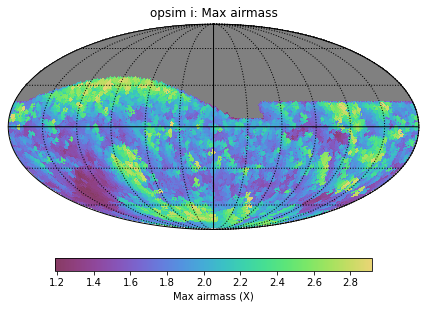

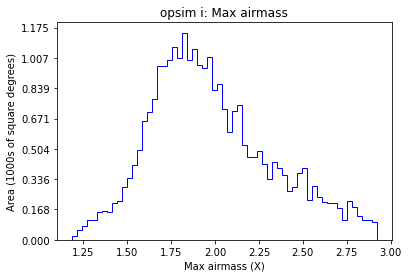

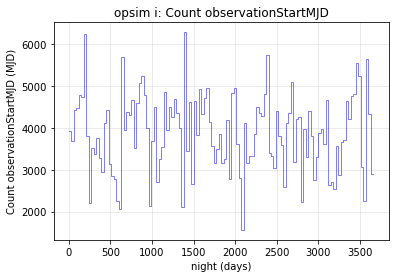

In [7]:
# define a metric bundle group, and plot the results
group = metricBundles.MetricBundleGroup(
    bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

_Each metric bundle saves the results of the metric calculation in an attribute called _MetricValues_. In the following cell all the results are shown._

In [8]:
print("Array with the number of visits per 30 nights:\n", nvisitsNight.metricValues)
print("Array with the maximum values of airmass for each Healpix:\n", airmassSky.metricValues)

Array with the number of visits per 30 nights:
 [3937.0 3699.0 4430.0 4476.0 4779.0 4731.0 6259.0 3812.0 2200.0 3512.0
 3373.0 3756.0 3279.0 2951.0 4127.0 4420.0 3127.0 2851.0 2779.0 2250.0
 2073.0 5709.0 3964.0 4392.0 4314.0 4662.0 3533.0 4598.0 5076.0 5249.0
 4788.0 4006.0 2131.0 3691.0 4514.0 2708.0 3262.0 3557.0 4860.0 3951.0
 4504.0 4254.0 4696.0 4351.0 4005.0 2121.0 6293.0 3462.0 4622.0 2654.0
 4641.0 3829.0 4944.0 4328.0 4721.0 4951.0 4135.0 3562.0 3166.0 3487.0
 3859.0 3160.0 3263.0 4192.0 2786.0 4842.0 4951.0 3620.0 2796.0 1561.0
 4131.0 3165.0 3323.0 3333.0 3855.0 4509.0 4369.0 4289.0 4803.0 5754.0
 3413.0 3323.0 3050.0 4416.0 3817.0 3603.0 2590.0 4132.0 4356.0 5113.0
 3197.0 4213.0 4272.0 2229.0 3968.0 3301.0 4397.0 3816.0 2762.0 3306.0
 3884.0 3976.0 3619.0 4660.0 2637.0 2720.0 2552.0 3562.0 2869.0 3665.0
 3716.0 4651.0 4211.0 4770.0 4813.0 5561.0 5257.0 3070.0 2244.0 5648.0
 4347.0 2905.0]
Array with the maximum values of airmass for each Healpix:
 [-- -- -- ... 2.07405087